In [1]:
'''
AIR HW3 - 4031
problem 1
SName: Mohammad Ziyari
Snumber: 40306374
'''

'\nAIR HW3 - 4031\nproblem 1\nSName: Mohammad Ziyari\nSnumber: 40306374\n'

In [2]:
# question number 1

In [3]:
import re
from collections import Counter

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    return tokens

In [4]:
input_text = """Artificial intelligence (AI) is transforming industries worldwide. 
From automating complex tasks to driving innovation, AI has become a cornerstone 
in fields like healthcare, finance, and transportation. Machine learning, a subset of AI, 
enables systems to learn from data, making predictions and improving decision-making processes. 
As AI technology advances, ethical considerations become increasingly important, with discussions 
on transparency, fairness, and accountability."""

In [5]:
tokens = preprocess_text(input_text)

print("Processed Tokens:", tokens)

Processed Tokens: ['artificial', 'intelligence', 'ai', 'is', 'transforming', 'industries', 'worldwide', 'from', 'automating', 'complex', 'tasks', 'to', 'driving', 'innovation', 'ai', 'has', 'become', 'a', 'cornerstone', 'in', 'fields', 'like', 'healthcare', 'finance', 'and', 'transportation', 'machine', 'learning', 'a', 'subset', 'of', 'ai', 'enables', 'systems', 'to', 'learn', 'from', 'data', 'making', 'predictions', 'and', 'improving', 'decisionmaking', 'processes', 'as', 'ai', 'technology', 'advances', 'ethical', 'considerations', 'become', 'increasingly', 'important', 'with', 'discussions', 'on', 'transparency', 'fairness', 'and', 'accountability']


In [6]:
import numpy as np

def build_unigram_model(tokens):
    word_counts = Counter(tokens)
    total_tokens = sum(word_counts.values())
    unigram_probs = {word: count / total_tokens for word, count in word_counts.items()}
    return unigram_probs, total_tokens, word_counts


def calculate_unique_terms(tokens):
    unique_terms = set(tokens)
    return len(unique_terms)

unique_terms_count = calculate_unique_terms(tokens)
print(f"Number of unique terms in the document: {unique_terms_count}")


Number of unique terms in the document: 51


In [7]:
# Additive Smoothing
def additive_smoothing(word, word_counts, total_tokens, vocab_size, delta=1):
    count = word_counts.get(word, 0) 
    return (count + delta) / (total_tokens + vocab_size)

# Absolute Discounting Smoothing
def absolute_discounting_smoothing(word, word_counts, total_tokens, vocab_size, delta=0.75):
    count = word_counts.get(word, 0)
    return ((max(count - delta, 0)) + (delta * unique_terms_count * background_prob)) / total_tokens 


In [8]:
# Jelinek-Mercer Smoothing
def jelinek_mercer_smoothing(word, word_counts, total_tokens, background_prob, lambda_=0.7):
    count = word_counts.get(word, 0)
    return (1 - lambda_) * (count / total_tokens) + lambda_ *  background_prob


# Dirichlet Prior Smoothing
def dirichlet_prior_smoothing(word, word_counts, total_tokens, background_prob, mu=2000):
    count = word_counts.get(word, 0)
    return (count + mu * background_prob) / (total_tokens + mu)

In [23]:
unigram_probs, total_tokens, word_counts = build_unigram_model(tokens)
vocab_size = len(word_counts)

background_prob = 1 / vocab_size  
word_to_test = "a" 

additive_prob = additive_smoothing(word_to_test, word_counts, total_tokens, vocab_size, delta=1)
absolute_prob = absolute_discounting_smoothing(word_to_test, word_counts, total_tokens, vocab_size, delta=0.75)
jm_prob = jelinek_mercer_smoothing(word_to_test, word_counts, total_tokens, background_prob, lambda_=0.7)
dirichlet_prob = dirichlet_prior_smoothing(word_to_test, word_counts, total_tokens, background_prob, mu=2000)

print(f"Additive Smoothing Probability for '{word_to_test}': {additive_prob}")
print(f"Absolute Discounting Smoothing Probability for '{word_to_test}': {absolute_prob}")
print(f"Jelinek-Mercer Smoothing Probability for '{word_to_test}': {jm_prob}")
print(f"Dirichlet Prior Smoothing Probability for '{word_to_test}': {dirichlet_prob}")


Additive Smoothing Probability for 'a': 0.02702702702702703
Absolute Discounting Smoothing Probability for 'a': 0.03333333333333333
Jelinek-Mercer Smoothing Probability for 'a': 0.023725490196078433
Dirichlet Prior Smoothing Probability for 'a': 0.020007614696363984


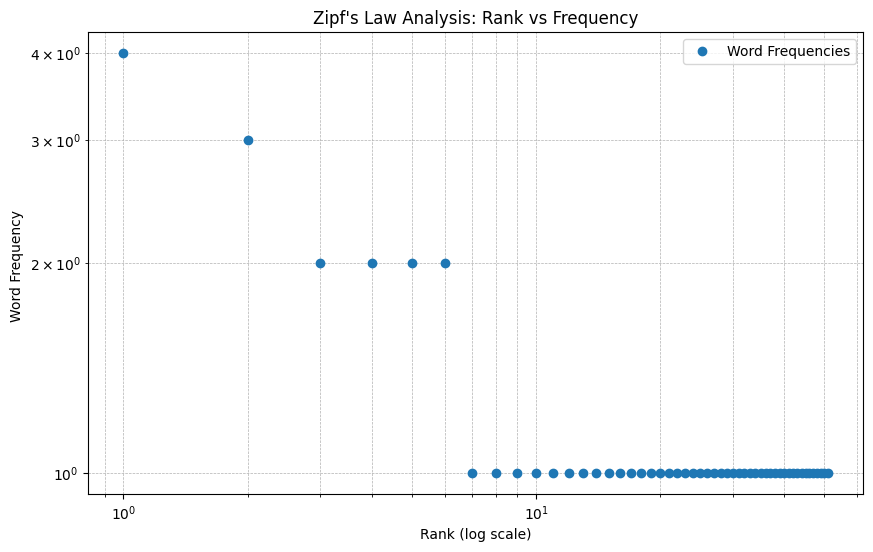

In [10]:
import matplotlib.pyplot as plt

def plot_zipf(word_counts):
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    ranks = range(1, len(sorted_word_counts) + 1)  
    frequencies = [freq for _, freq in sorted_word_counts]

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker="o", linestyle="None", label="Word Frequencies")
    plt.title("Zipf's Law Analysis: Rank vs Frequency")
    plt.xlabel("Rank (log scale)")
    plt.ylabel("Word Frequency ")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

plot_zipf(word_counts)

In [11]:
# باتوجه به نمودار رسم شده، توزیع متن با قانون مورد نظر همخوانی دارد. زیرا نمودار در مقیاس الگاریتمی خط مستقیمی با شیب منفی است.

In [12]:
import math

def cross_entropy(unigram_probs, smoothing_probs):
    """Calculate cross-entropy between p(w) and q(w)."""
    entropy = 0
    for word, p_w in unigram_probs.items():
        q_w = smoothing_probs.get(word, 0) 
        if q_w > 0:  
            entropy -= p_w * math.log(q_w)
    return entropy

In [13]:
def generate_smoothing_probs(word_counts, total_tokens, vocab_size, unigram_probs):
    smoothed_probs = {}

    smoothed_probs["Additive"] = {
        word: additive_smoothing(word, word_counts, total_tokens, vocab_size, delta=1)
        for word in unigram_probs
    }

    unique_terms_count = len(word_counts) 
    background_prob = 1 / vocab_size  
    smoothed_probs["Absolute"] = {
        word: absolute_discounting_smoothing(
            word, word_counts, total_tokens, vocab_size, delta=0.75
        )
        for word in unigram_probs
    }

    smoothed_probs["Jelinek-Mercer"] = {
        word: jelinek_mercer_smoothing(
            word, word_counts, total_tokens, background_prob, lambda_=0.7
        )
        for word in unigram_probs
    }

    smoothed_probs["Dirichlet"] = {
        word: dirichlet_prior_smoothing(
            word, word_counts, total_tokens, background_prob, mu=2000
        )
        for word in unigram_probs
    }

    return smoothed_probs

In [14]:
smoothed_probs = generate_smoothing_probs(word_counts, total_tokens, vocab_size, unigram_probs)

cross_entropy_values = {
    method: cross_entropy(unigram_probs, probs)
    for method, probs in smoothed_probs.items()
}

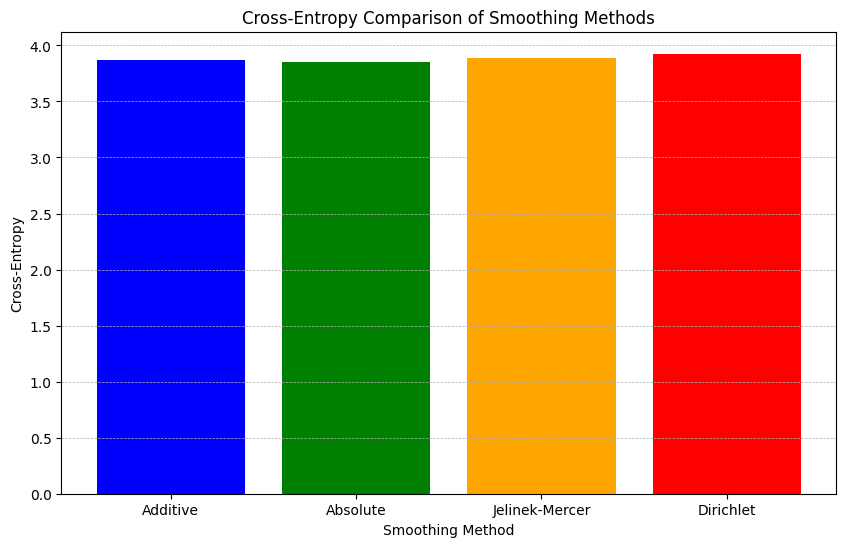

Cross-Entropy Values for Each Smoothing Method:
Additive: 3.8665775985183553
Absolute: 3.854574699639378
Jelinek-Mercer: 3.8856948238074214
Dirichlet: 3.925706066209005


In [15]:
def plot_cross_entropy(cross_entropy_values):
    methods = list(cross_entropy_values.keys())
    values = list(cross_entropy_values.values())

    plt.figure(figsize=(10, 6))
    plt.bar(methods, values, color=["blue", "green", "orange", "red"])
    plt.title("Cross-Entropy Comparison of Smoothing Methods")
    plt.xlabel("Smoothing Method")
    plt.ylabel("Cross-Entropy")
    plt.grid(axis="y", linestyle="--", linewidth=0.5)
    plt.show()

plot_cross_entropy(cross_entropy_values)

print("Cross-Entropy Values for Each Smoothing Method:")
for method, value in cross_entropy_values.items():
    print(f"{method}: {value}")

In [16]:
# باتوجه به نمودار مشاهده شده، متدی که کمترین آنتروپی را داشته باشد بهترین است
# البته اختلاف آنتروپی بین متد ها واقعا ناچیز است
#top methos is absolute

"""
پس برای قسمت بعد، از این متد استفاده میشود
البته اگر حق انتخاب داشتم قطعا از متد دیریچلت استفاده میکردم
ولی باتوجه به خواسته سوال از ابسولوت استفاده خواهد شد

"""

'\nپس برای قسمت بعد، از این متد استفاده میشود\nالبته اگر حق انتخاب داشتم قطعا از متد دیریچلت استفاده میکردم\nولی باتوجه به خواسته سوال از ابسولوت استفاده خواهد شد\n\n'

In [17]:
import random

def generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75):
    unique_terms_count = len(word_counts)
    background_prob = 1 / vocab_size
    smoothed_probs = {
        word: absolute_discounting_smoothing(
            word, word_counts, total_tokens, vocab_size, delta
        )
        for word in word_counts
    }

    total_prob = sum(smoothed_probs.values())
    normalized_probs = {word: prob / total_prob for word, prob in smoothed_probs.items()}

    words = list(normalized_probs.keys())
    probabilities = list(normalized_probs.values())
    generated_text = []
    
    for _ in range(num_words):
        generated_word = random.choices(words, weights=probabilities, k=1)[0]
        generated_text.append(generated_word)

    return " ".join(generated_text)

In [18]:
sample_text = generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75)

print("Generated Text using Absolute smoothin:")
print(sample_text)

Generated Text using Absolute smoothin:
healthcare intelligence subset predictions from worldwide fields important decisionmaking a to technology cornerstone driving advances increasingly and is learning become transportation complex and transforming important ai technology to considerations considerations advances ai and ai transparency accountability from subset to to improving like transportation important from in processes a ai increasingly


In [19]:
sample_text = generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75)

print("Generated Text using Absolute smoothin:")
print(sample_text)

Generated Text using Absolute smoothin:
automating advances from with a like innovation transparency learn fairness fields learn considerations complex improving is ai become with systems considerations innovation of subset making of automating finance become technology considerations and to data decisionmaking processes in systems a systems making decisionmaking ai a automating subset become ai transparency as


In [20]:
sample_text = generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75)

print("Generated Text using Absolute smoothin:")
print(sample_text)

Generated Text using Absolute smoothin:
become fields driving worldwide ai intelligence enables advances fields in ai transforming discussions tasks enables technology learning increasingly become ai on important intelligence intelligence in is complex discussions intelligence enables and on increasingly systems fairness tasks machine has decisionmaking from artificial is a improving finance tasks data automating has fields


In [21]:
sample_text = generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75)

print("Generated Text using Absolute smoothin:")
print(sample_text)

Generated Text using Absolute smoothin:
in tasks important ai transportation machine become to become innovation driving become improving industries of to worldwide fields healthcare transparency ai innovation technology automating important a ai healthcare subset ai complex automating decisionmaking ai data of driving intelligence as making decisionmaking tasks worldwide become industries tasks processes innovation intelligence improving


In [24]:
sample_text = generate_text(word_counts, total_tokens, vocab_size, num_words=50, delta=0.75)

print("Generated Text using Absolute smoothin:")
print(sample_text)

Generated Text using Absolute smoothin:
transparency become learn subset subset become worldwide innovation systems enables and a decisionmaking cornerstone in discussions automating decisionmaking systems enables healthcare innovation important driving in discussions transparency enables fields ai increasingly considerations of intelligence intelligence ai improving worldwide of is of with fairness making and from accountability decisionmaking transparency healthcare
